In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Preparing Data

In [2]:
path = '/Users/melawai.it/Documents/Work/Hacktiv8/PYTN-KS17/Sesi 7/Canada.xlsx'

In [9]:
df_can = pd.read_excel(path, 
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20), 
                       skipfooter=2)

In [10]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [6]:
df_can.shape

(195, 43)

In [11]:
# Dropping Unnecessary Columns
col_drop = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df_can.drop(col_drop, axis=1, inplace=True)

# Renaming Columns
newName = {
    'OdName' : 'Country',
    'AreaName' : 'Continent',
    'RegName' : 'Region'
}
df_can.rename(columns=newName, inplace=True)

# For Consistency sake
df_can.columns = list(map(str, df_can.columns))

# Making Country Column become Index
df_can.set_index('Country', inplace=True)
df_can.index.name = None

# Adding new column called 'Total'
df_can['Total'] = df_can.sum(axis=1)

# preparing a variable that will make us easy to slicing df
years = list(map(str, range(1980, 2014)))

print('Data Dimension : ',df_can.shape)

Data Dimension :  (195, 38)


/var/folders/pw/z_nfq_0j4g3ckjz532ktnkjm0000gn/T/ipykernel_2994/4052582386.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# Visualizing Data

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [13]:
mpl.style.use(['ggplot'])

In [14]:
mpl.__version__

'3.7.1'

## Word Clouds

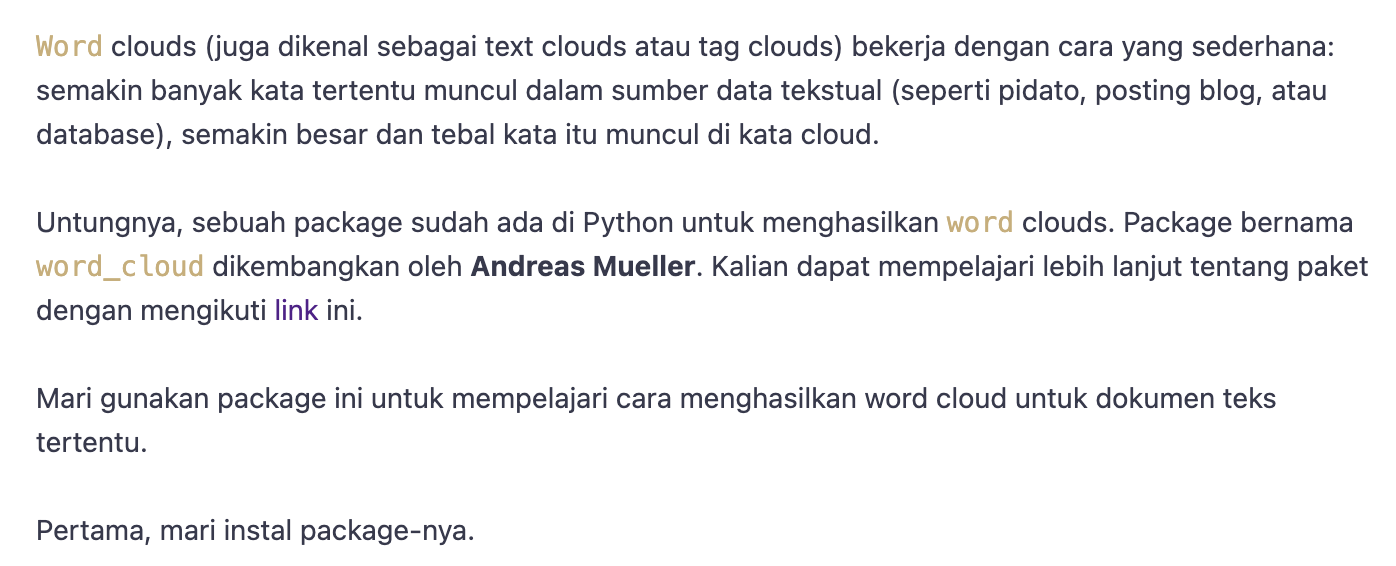

In [ ]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt

In [16]:
path_alice = '/Users/melawai.it/Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/alice_novel.txt'

In [28]:
alice_novel = open(path_alice, 'r').read()

In [18]:
stopwords = set(STOPWORDS)

In [19]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [48]:
alice_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwords,
    width = 1350,
    height = 1050
)

In [29]:
alice_wc.generate(alice_novel)

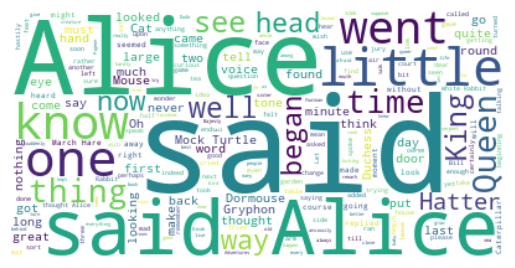

In [37]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

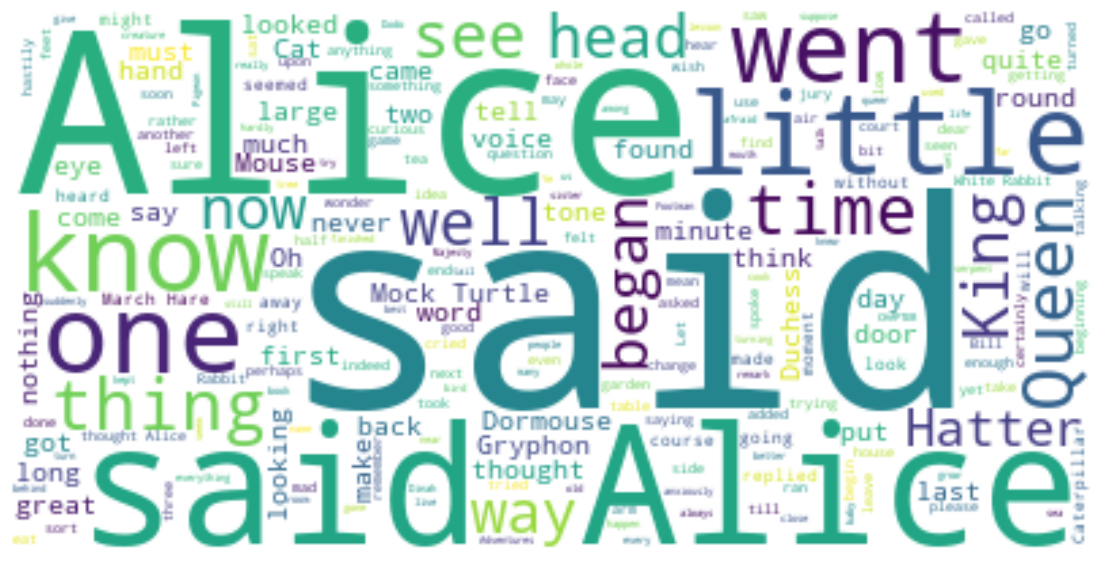

In [40]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

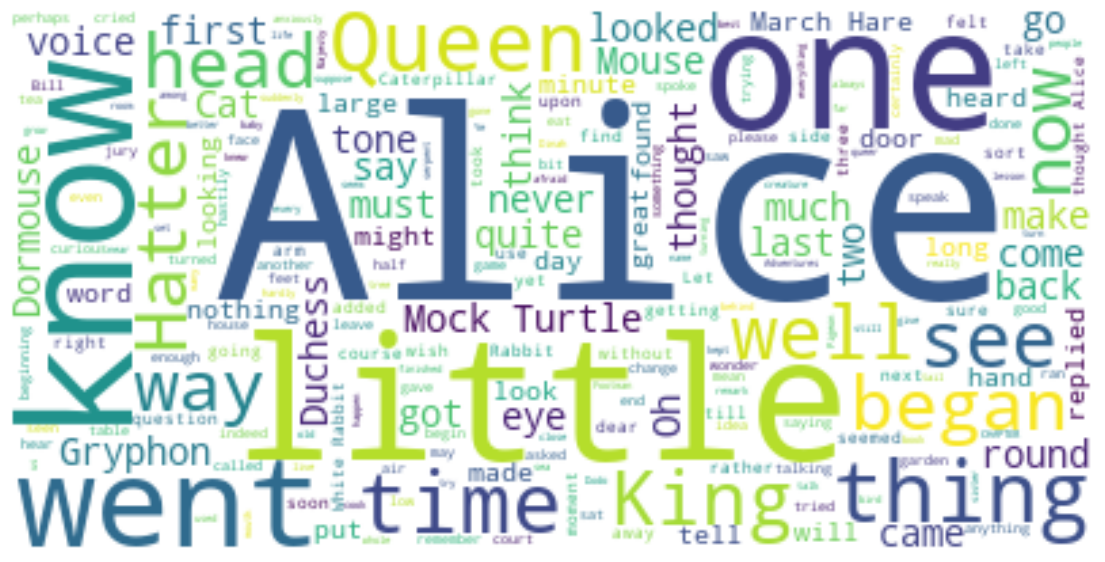

In [41]:
stopwords.add('said')

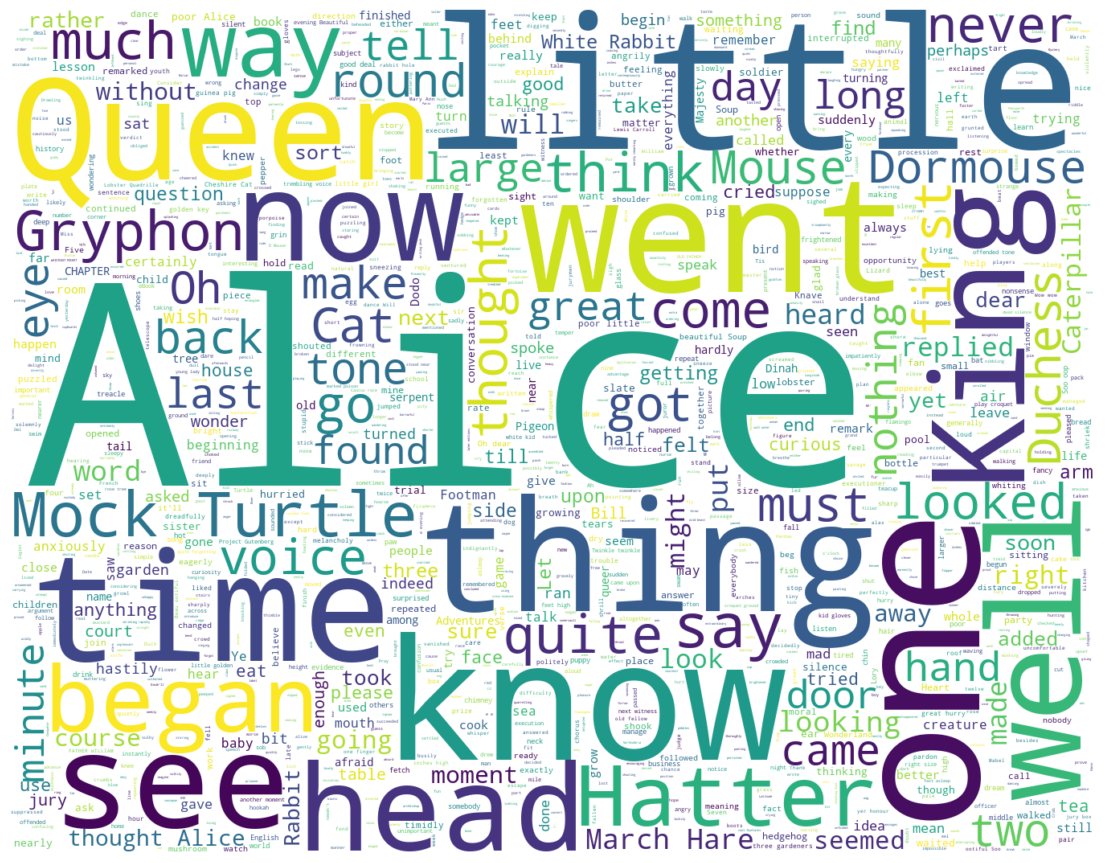

In [49]:
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png

In [50]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png

/bin/bash: wget: command not found


In [51]:
path_mask = '/Users/melawai.it/Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/alice_mask.png'

In [52]:
alice_mask = np.array(Image.open(path_mask))

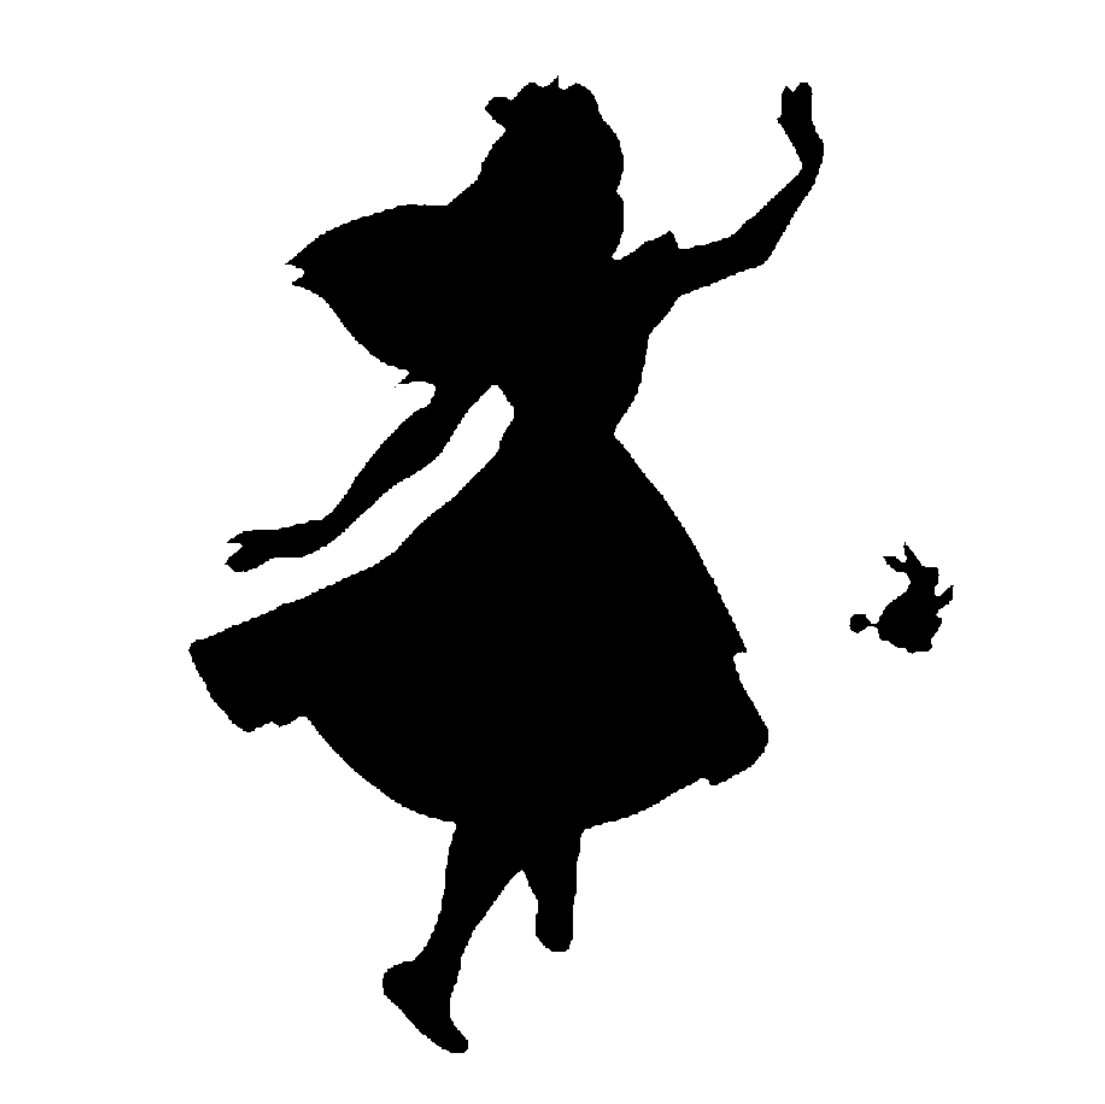

In [55]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

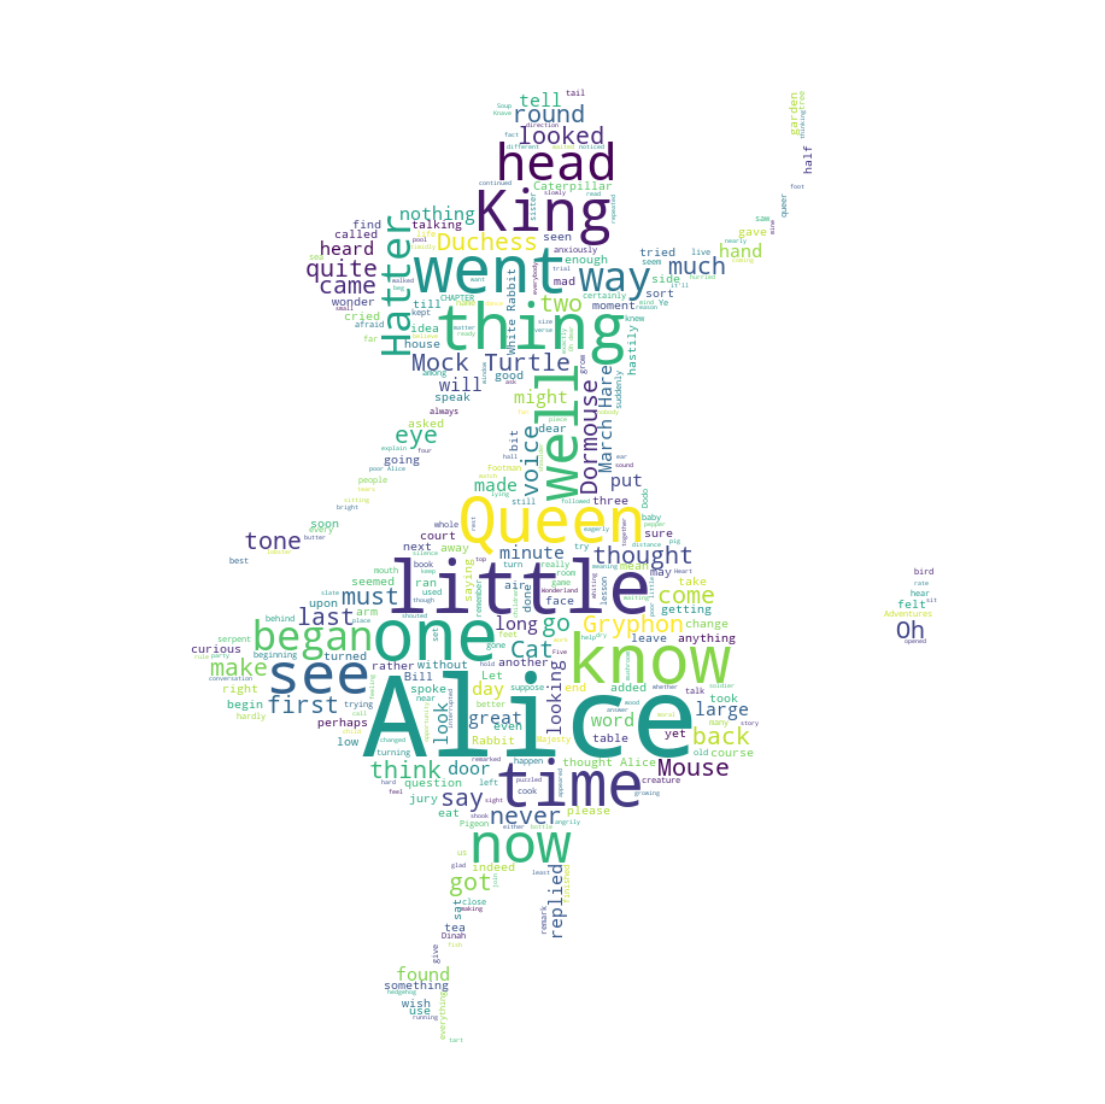

In [57]:
alice_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwords,
    mask = alice_mask,
    width = 1350,
    height = 1050
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
total_immigrations = df_can['Total'].sum()
total_immigrations

6409153

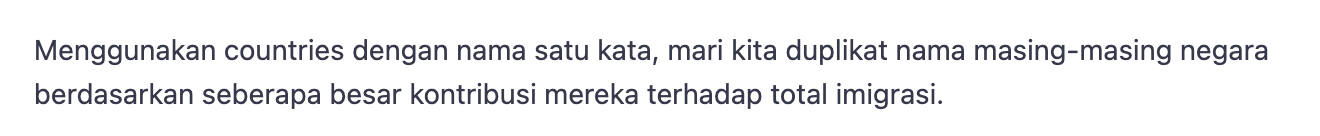

In [59]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name if a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total'] / float(total_immigrations)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [62]:
# Create Word Cloud
wordcloud = WordCloud(
    background_color='white',
    width = 1350,
    height = 1050
    
    ).generate(word_string)

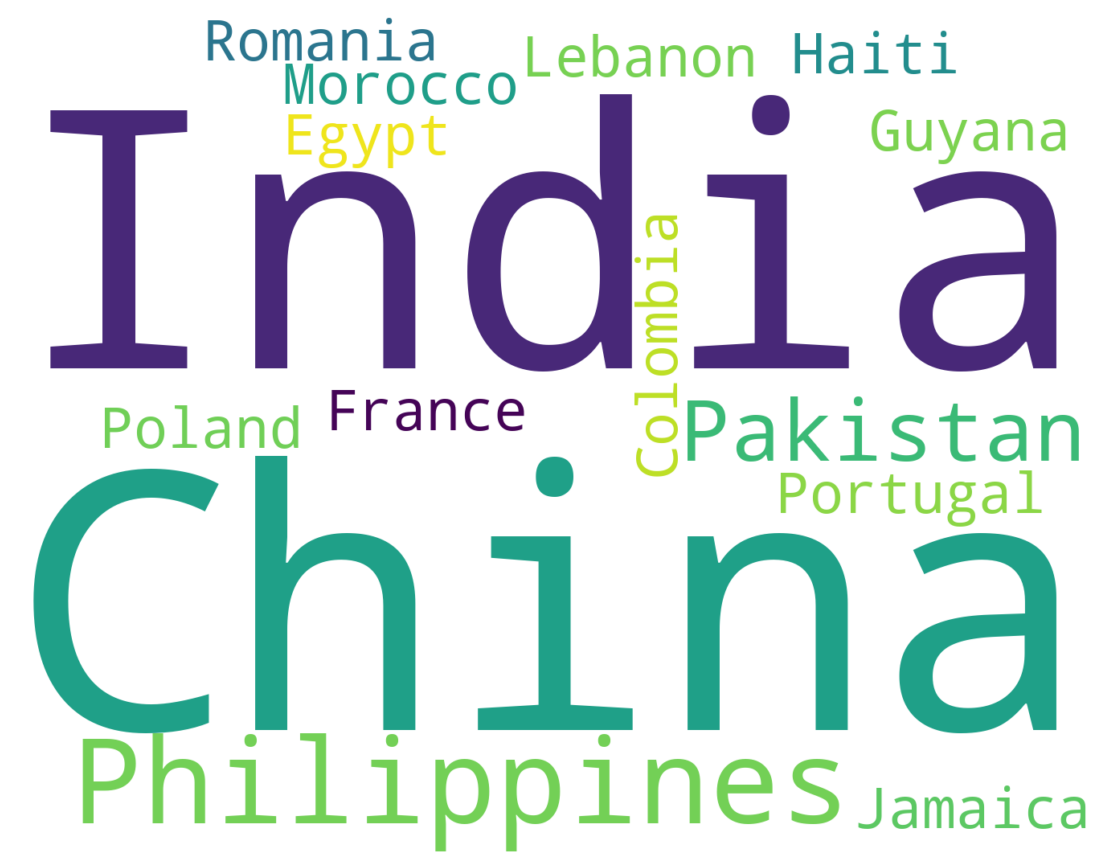

In [63]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plot

In [ ]:
!pip install seaborn

In [64]:
import seaborn as sns

In [65]:
sns.__version__

'0.12.2'

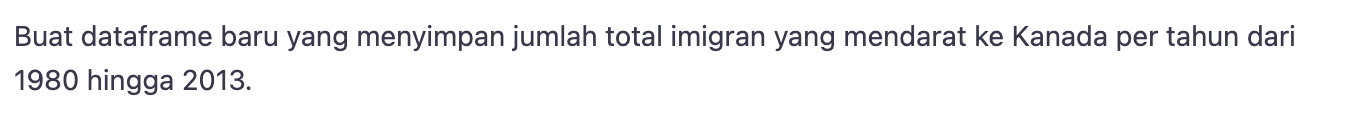

In [67]:
# menggunakan sum() untuk mendapatkan total imigran per tahun
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# ubah index tahun menjadi float
df_tot.index = map(float, df_tot.index)

# reset index, sehingga tahun menjadi kolom
df_tot.reset_index(inplace=True)

df_tot.columns = ['years', 'total']

df_tot.head()

years   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

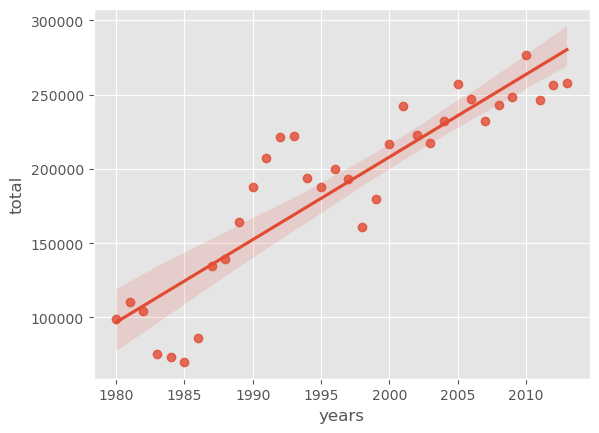

In [69]:
ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot
                )

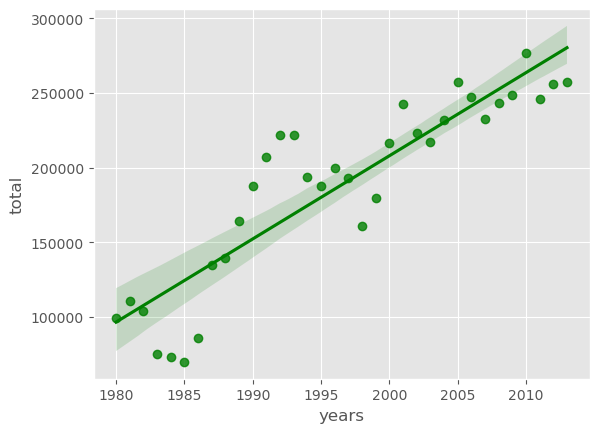

In [70]:
ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot,
                 color='green'
                )

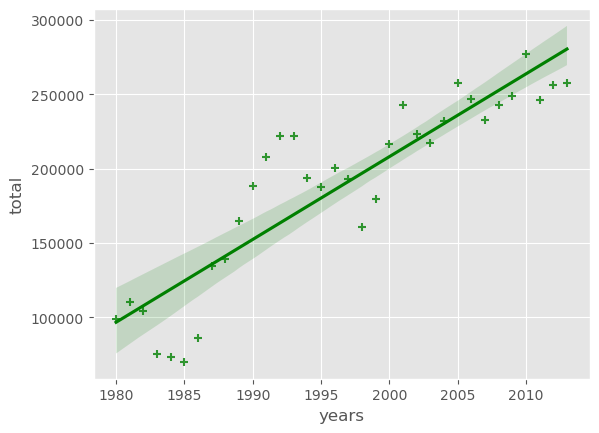

In [71]:
ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+'
                )

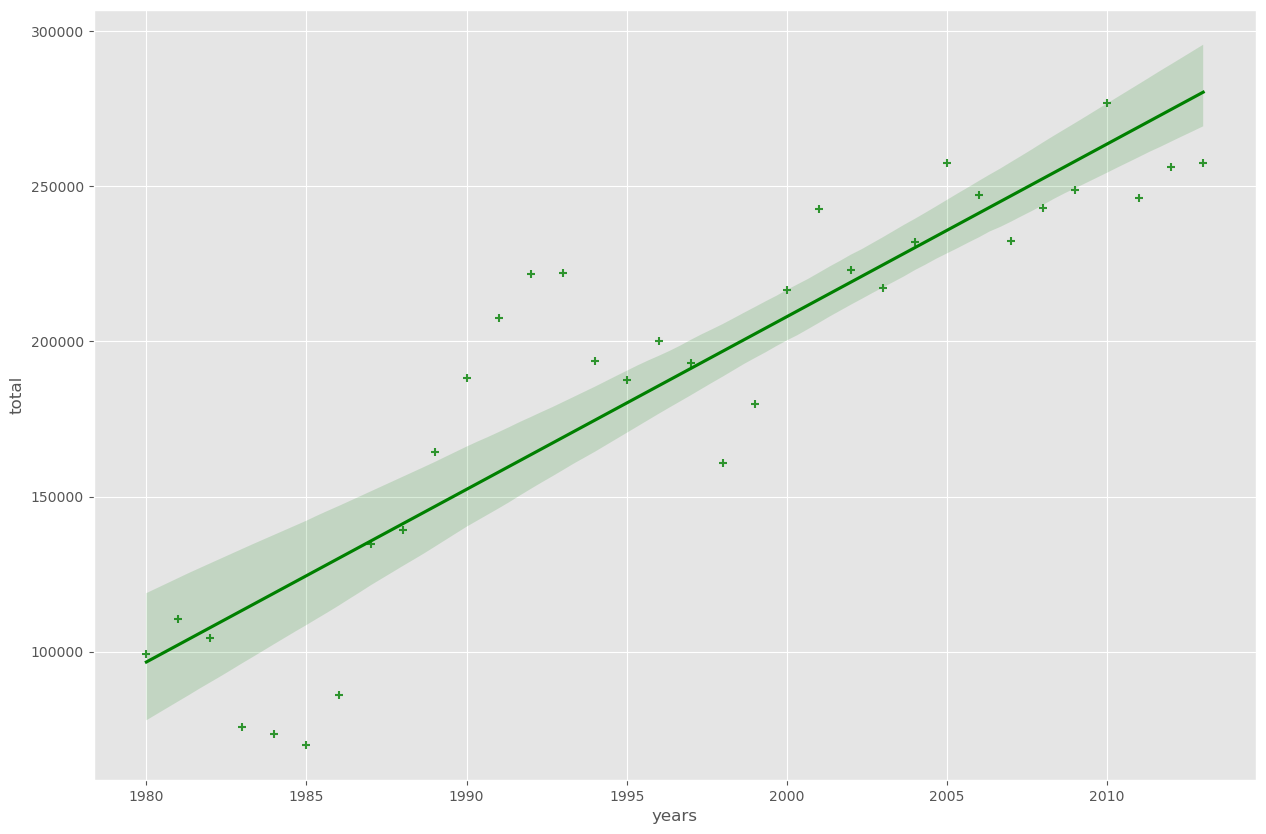

In [72]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+'
                )

[Text(0, 0.5, 'Total Immigration'), Text(0.5, 0, 'Year')]

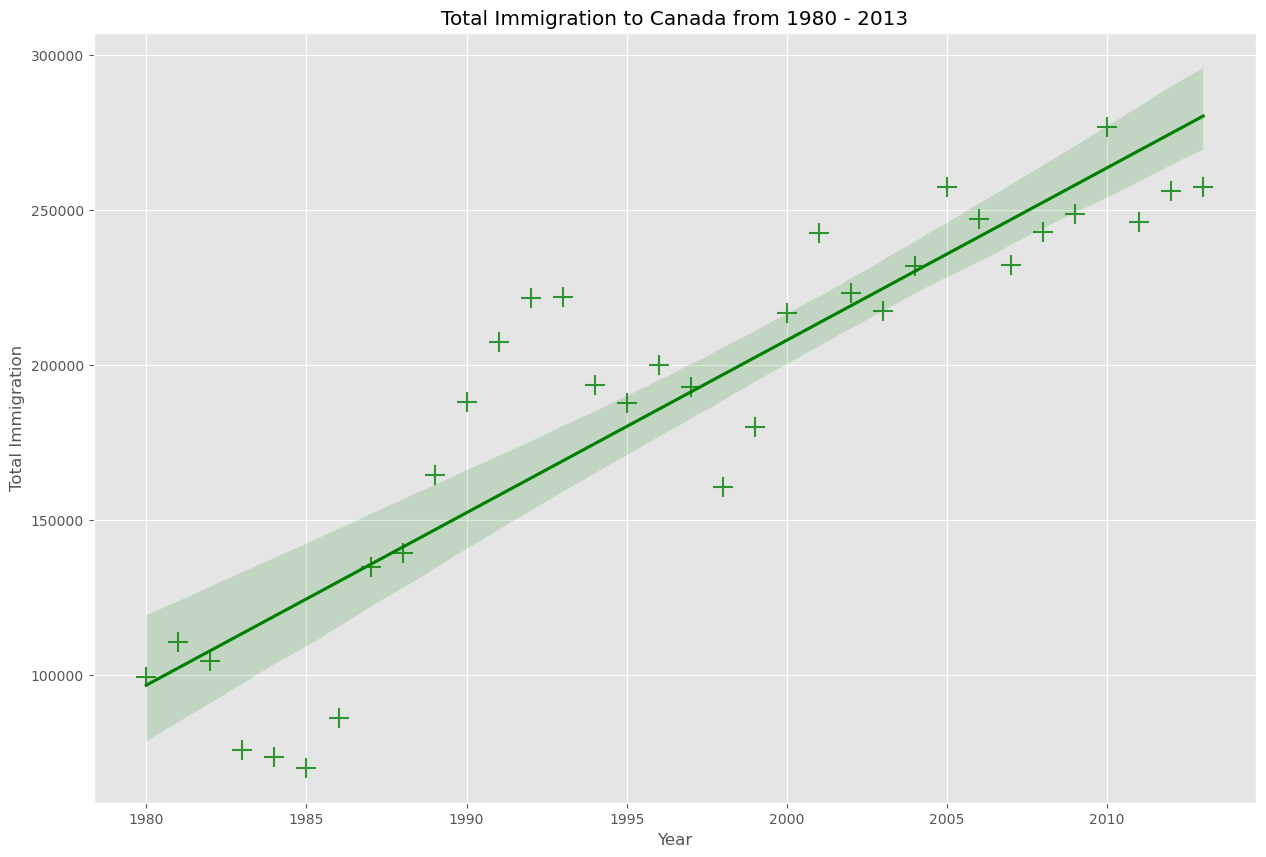

In [81]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200}
                )
ax.set_title('Total Immigration to Canada from 1980 - 2013')
ax.set(ylabel = 'Total Immigration', xlabel = 'Year')

[Text(0, 0.5, 'Total Immigration'), Text(0.5, 0, 'Year')]

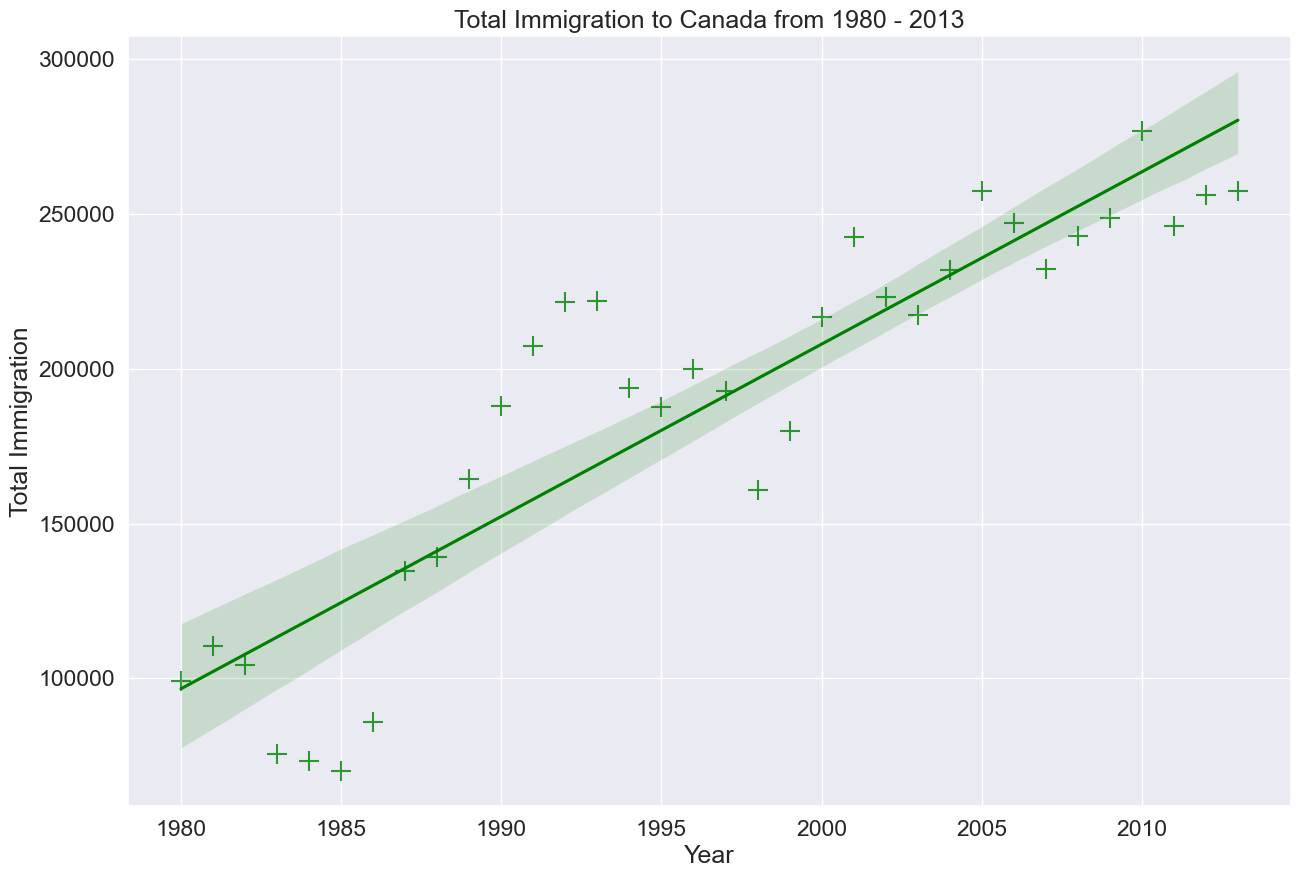

In [82]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200}
                )
ax.set_title('Total Immigration to Canada from 1980 - 2013')
ax.set(ylabel = 'Total Immigration', xlabel = 'Year')

[Text(0, 0.5, 'Total Immigration'), Text(0.5, 0, 'Year')]

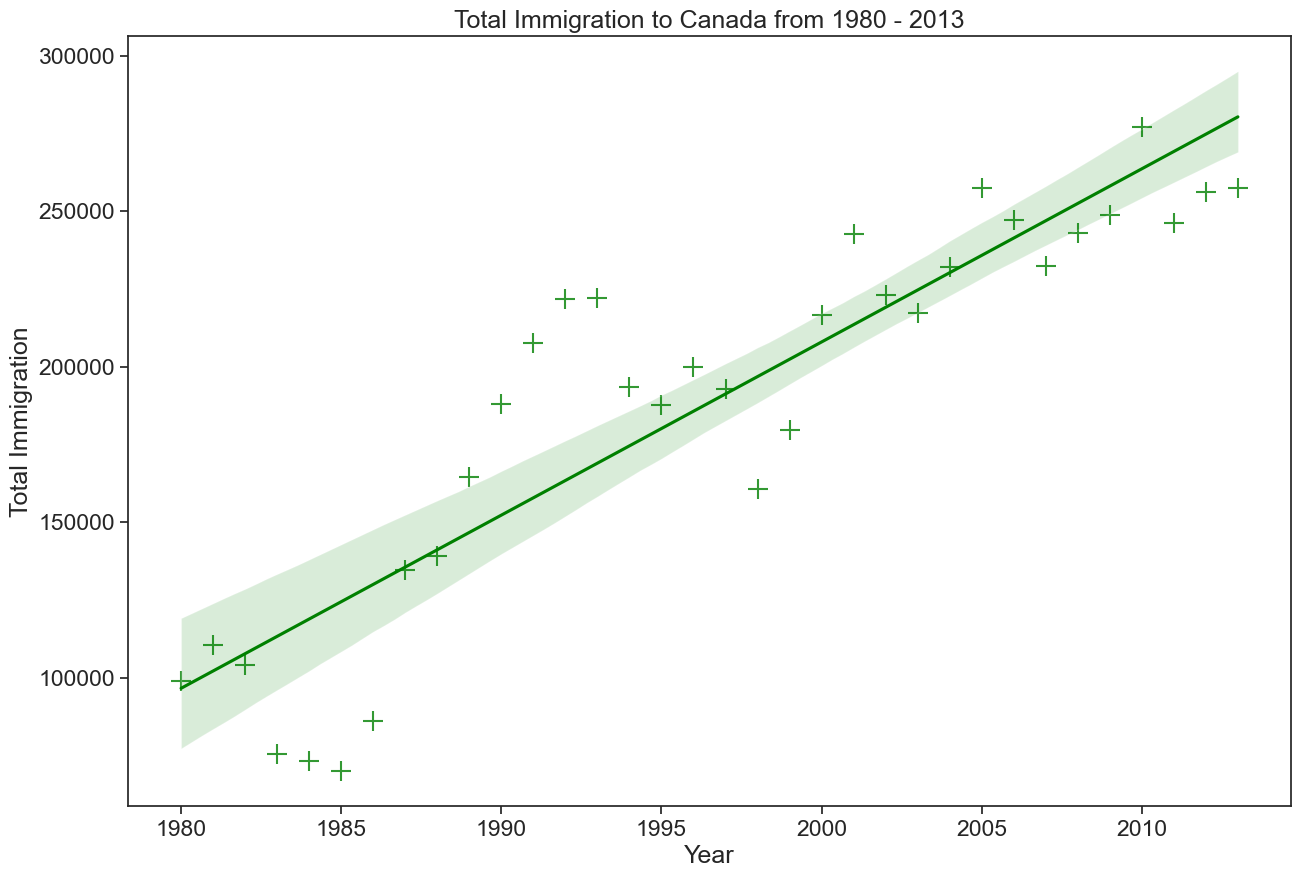

In [83]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200}
                )
ax.set_title('Total Immigration to Canada from 1980 - 2013')
ax.set(ylabel = 'Total Immigration', xlabel = 'Year')

[Text(0, 0.5, 'Total Immigration'), Text(0.5, 0, 'Year')]

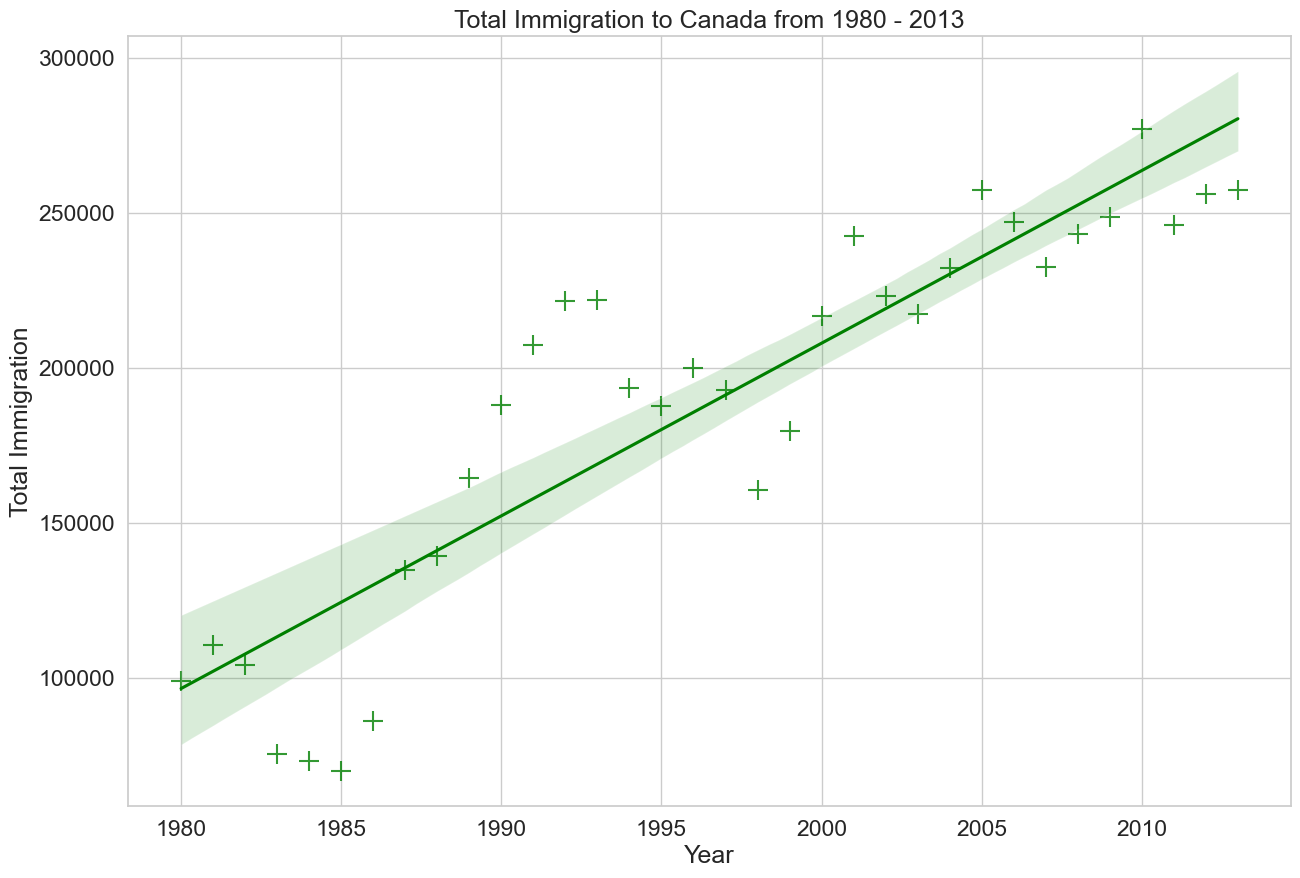

In [84]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='years',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200}
                )
ax.set_title('Total Immigration to Canada from 1980 - 2013')
ax.set(ylabel = 'Total Immigration', xlabel = 'Year')

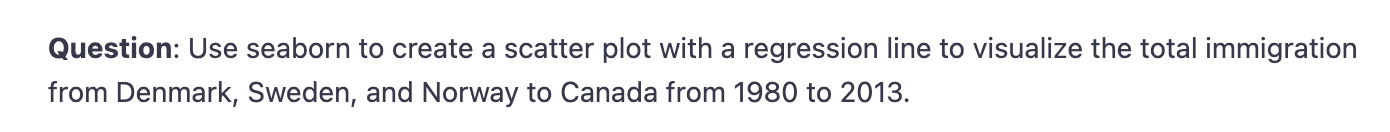

In [91]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head()

Denmark  Norway  Sweden
1980      272     116     281
1981      293      77     308
1982      299     106     222
1983      106      51     176
1984       93      31     128

In [88]:
df_total = pd.DataFrame(df_countries.sum(axis=1))

In [90]:
df_total.head()

0
1980  669
1981  678
1982  627
1983  333
1984  252

In [93]:
df_total.reset_index(inplace=True)

In [94]:
df_total.head()

index    0
0  1980  669
1  1981  678
2  1982  627
3  1983  333
4  1984  252

In [95]:
df_total.columns = ['years', 'total']
df_total.head()

years  total
0  1980    669
1  1981    678
2  1982    627
3  1983    333
4  1984    252

In [96]:
df_total['years'] = df_total['years'].astype(int)

[Text(0, 0.5, 'Total Immigration'), Text(0.5, 0, 'Year')]

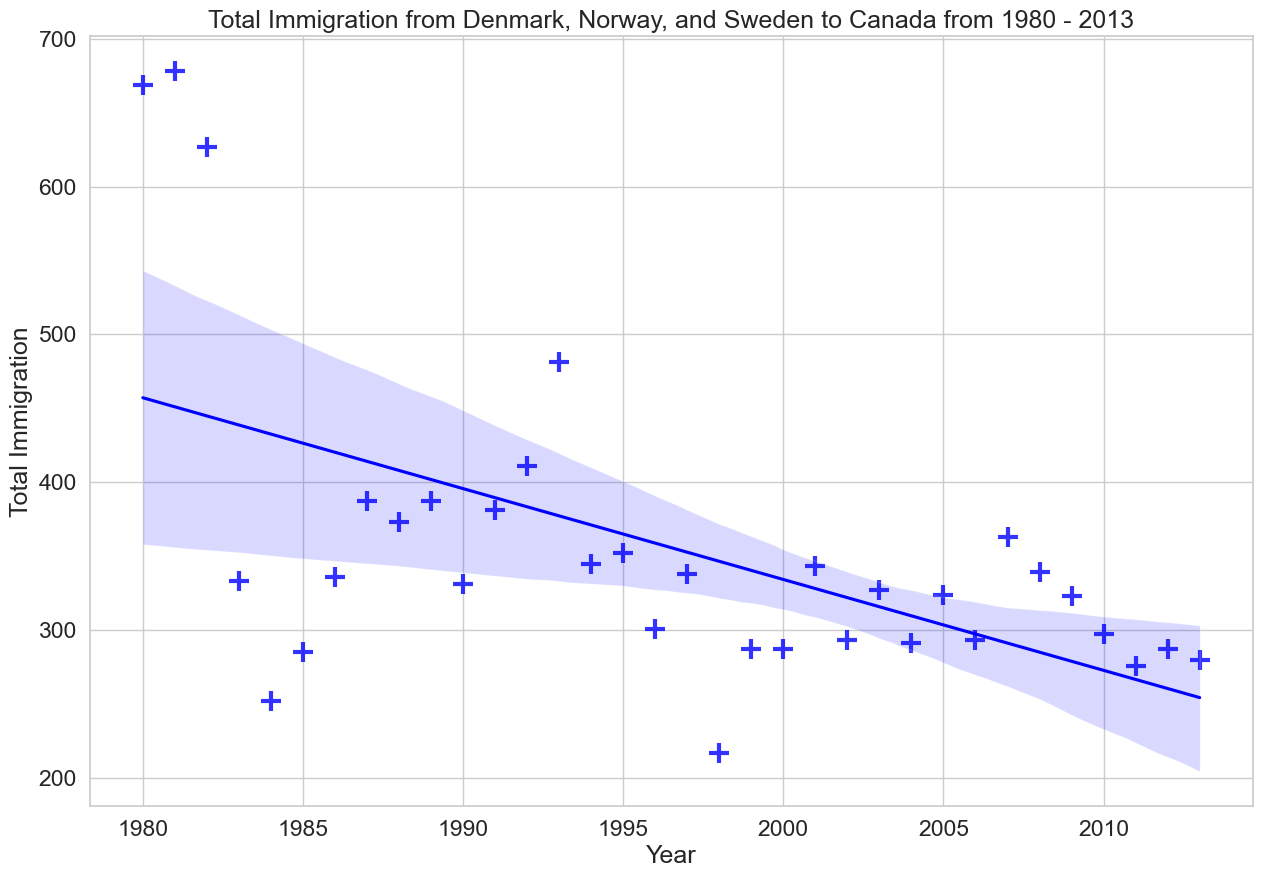

In [100]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='years',
                 y='total',
                 data=df_total,
                 color='blue',
                 marker='+',
                 scatter_kws={'s' : 200, 'lw' : 3}
                )

ax.set_title('Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
ax.set(ylabel = 'Total Immigration', 
       xlabel = 'Year')

# Visualization 2

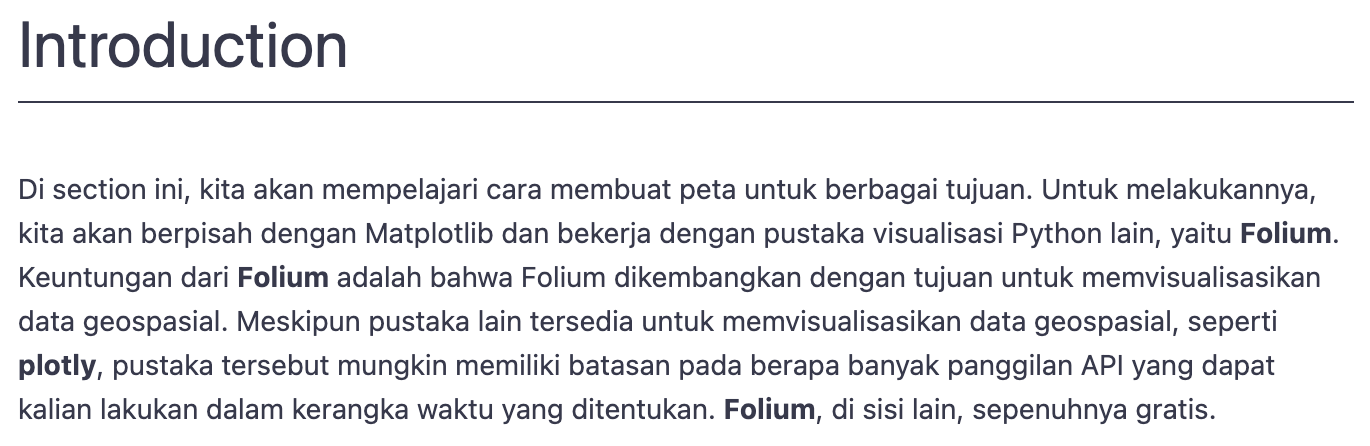

## Folium

In [101]:
import folium

In [123]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13)
world_map

### Stamen Toner Map

In [124]:
world_map = folium.Map(location=[-6.992620, 110.428009], 
                       zoom_start=13,
                      tiles='Stamen Toner')
world_map

### Stamen Terrain Map

In [125]:
world_map = folium.Map(location=[-6.992620, 110.428009], 
                       zoom_start=13,
                      tiles='Stamen Terrain')
world_map

## Maps with Marker

In [127]:
prefix = '/Users/melawai.it/'
path_incident = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/Police_Department_Incidents_-_Previous_Year__2016_.csv'

In [128]:
df_incidents = pd.read_csv(path_incident)
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [129]:
df_incidents.shape

(150500, 13)

In [130]:
limit = 100
df_incidents = df_incidents.iloc[:limit, :]

In [131]:
df_incidents.shape

(100, 13)

In [132]:
lat = 37.77
lng = -122.42

In [133]:
sanfran_map = folium.Map(location=[lat, lng], zoom_start = 12)

sanfran_map

In [141]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=.6
        )
    )

In [142]:
sanfran_map.add_child(incidents)

In [143]:
latitude = list(df_incidents.Y)
longitude = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitude, longitude, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

In [144]:
sanfran_map.add_child(incidents)

In [146]:
sanfran_map = folium.Map(location=[lat, lng], zoom_start = 12)

for lat, lng, label in zip(latitude, longitude, labels):
    folium.CircleMarker(
        [lat, lng], 
        popup=label,
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=.6
    ).add_to(sanfran_map)

In [147]:
sanfran_map

In [148]:
from folium import plugins

In [155]:
lat = 37.77
lng = -122.42
sanfran_map = folium.Map(location=[lat, lng], zoom_start = 12)

In [156]:
incidents = plugins.MarkerCluster().add_to(sanfran_map)

In [157]:
latitude = list(df_incidents.Y)
longitude = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitude, longitude, labels):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(incidents)

In [158]:
sanfran_map

## Choropleth Map

In [159]:
df_can

Continent              Region             DevName  1980  1981  \
Afghanistan         Asia       Southern Asia  Developing regions    16    39   
Albania           Europe     Southern Europe   Developed regions     1     0   
Algeria           Africa     Northern Africa  Developing regions    80    67   
American Samoa   Oceania           Polynesia  Developing regions     0     1   
Andorra           Europe     Southern Europe   Developed regions     0     0   
...                  ...                 ...                 ...   ...   ...   
Viet Nam            Asia  South-Eastern Asia  Developing regions  1191  1829   
Western Sahara    Africa     Northern Africa  Developing regions     0     0   
Yemen               Asia        Western Asia  Developing regions     1     2   
Zambia            Africa      Eastern Africa  Developing regions    11    17   
Zimbabwe          Africa      Eastern Africa  Developing regions    72   114   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   
...              ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
Viet Nam        2162  3404  7583  5907  2741  ...  1852  3153  2574  1784   
Western Sahara     0     0     0     0     0  ...     0     1     0     0   
Yemen              1     6     0    18     7  ...   161   140   122   133   
Zambia            11     7    16     9    15  ...    91    77    71    64   
Zimbabwe         102    44    32    29    43  ...   615   454   663   611   

                2009  2010  2011  2012  2013  Total  
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  
...              ...   ...   ...   ...   ...    ...  
Viet Nam        2171  1942  1723  1731  2112  97146  
Western Sahara     0     0     0     0     0      2  
Yemen            128   211   160   174   217   2985  
Zambia            60   102    69    46    59   1677  
Zimbabwe         508   494   434   437   407   8598  

[195 rows x 38 columns]

In [162]:
df_can.to_csv('df_can.csv')

In [163]:
# df_can = pd.read_csv(path)
# df_can.rename(columns={'Unnamed: 0' : 'Country'}, inplace=True)
# df_can

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 14: invalid continuation byte

In [165]:
df_can.reset_index(inplace=True)
df_can

index Continent              Region             DevName  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  \
0      39    39    47    71   340  ...  3436  3009  2652  2111  1746  1758   
1       0     0     0     0     0  ...  1223   856   702   560   716   561   
2      67    71    69    63    44  ...  3626  4807  3623  4005  5393  4752   
3       1     0     0     0     0  ...     0     1     0     0     0     0   
4       0     0     0     0     0  ...     0     1     1     0     0     0   
..    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
190  1829  2162  3404  7583  5907  ...  1852  3153  2574  1784  2171  1942   
191     0     0     0     0     0  ...     0     1     0     0     0     0   
192     2     1     6     0    18  ...   161   140   122   133   128   211   
193    17    11     7    16     9  ...    91    77    71    64    60   102   
194   114   102    44    32    29  ...   615   454   663   611   508   494   

     2011  2012  2013  Total  
0    2203  2635  2004  58639  
1     539   620   603  15699  
2    4325  3774  4331  69439  
3       0     0     0      6  
4       0     1     1     15  
..    ...   ...   ...    ...  
190  1723  1731  2112  97146  
191     0     0     0      2  
192   160   174   217   2985  
193    69    46    59   1677  
194   434   437   407   8598  

[195 rows x 39 columns]

In [167]:
df_can.rename(columns={'index': 'Country'}, inplace=True)
df_can

Country Continent              Region             DevName  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  \
0      39    39    47    71   340  ...  3436  3009  2652  2111  1746  1758   
1       0     0     0     0     0  ...  1223   856   702   560   716   561   
2      67    71    69    63    44  ...  3626  4807  3623  4005  5393  4752   
3       1     0     0     0     0  ...     0     1     0     0     0     0   
4       0     0     0     0     0  ...     0     1     1     0     0     0   
..    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
190  1829  2162  3404  7583  5907  ...  1852  3153  2574  1784  2171  1942   
191     0     0     0     0     0  ...     0     1     0     0     0     0   
192     2     1     6     0    18  ...   161   140   122   133   128   211   
193    17    11     7    16     9  ...    91    77    71    64    60   102   
194   114   102    44    32    29  ...   615   454   663   611   508   494   

     2011  2012  2013  Total  
0    2203  2635  2004  58639  
1     539   620   603  15699  
2    4325  3774  4331  69439  
3       0     0     0      6  
4       0     1     1     15  
..    ...   ...   ...    ...  
190  1723  1731  2112  97146  
191     0     0     0      2  
192   160   174   217   2985  
193    69    46    59   1677  
194   434   437   407   8598  

[195 rows x 39 columns]

In [168]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json

In [169]:
prefix = '/Users/melawai.it/'

In [178]:
world_geo = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/world_countries.json'

In [176]:
world_map = folium.Map(location=[0,0],
                       zoom_start=2,
                       tiles= 'CartoDB positron'
                      )

In [179]:
world_map.choropleth(geo_data=world_geo,
                     data=df_can,
                     columns=['Country', 'Total'],
                     key_on='feature.properties.name',
                     fill_color='YlOrRd',
                     fill_opacity=.7,
                     line_opcity=.2,
                     legend_name='Immigration to Canada'
                    )

/Users/melawai.it/anaconda3/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [180]:
world_map